In [1]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras import backend as k
from keras.layers import Flatten, Dense

In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(612,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.99):
      print("/nreached 99% accuracy so stop training ")
      self.model.stop_training = True
callback = myCallBack()

In [6]:
model.fit(x_train,y_train, epochs=10, callbacks=[callback])
model.evaluate(x_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1962 - accuracy: 0.9421
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0799 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0365 - accuracy: 0.9883
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9793


[0.07314565777778625, 0.9793000221252441]

In [7]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
def uploadimg():
  uploaded = files.upload()
  #image = tf.io.read_file('/content/download (1) (9).png')
  #image = tf.io.decode_jpeg(image, channels=1)
  #return image
  uploaded_files = list(uploaded.keys())
  image_path = '/content/' + uploaded_files[0]
  image = tf.io.read_file(image_path)
  image = tf.io.decode_image(image, channels=1)
  return image

Mounted at /content/drive


In [8]:
def reshapping(image):
  image = tf.image.resize(image, size=[28,28])
  image = tf.reshape(image, [1,28,28,1])
  return image

def showimg(image):
  img = tf.squeeze(image).numpy()
  plt.imshow(img,cmap='gray')
  plt.show()

def prediction(image):
  r=model.predict(image)
  return r.argmax()

In [9]:
def main():
  image=uploadimg()
  image=reshapping(image)
  showimg(image)
  print(prediction(image))

Saving WhatsApp Image 2023-07-21 at 15.30.56.jpg to WhatsApp Image 2023-07-21 at 15.30.56.jpg


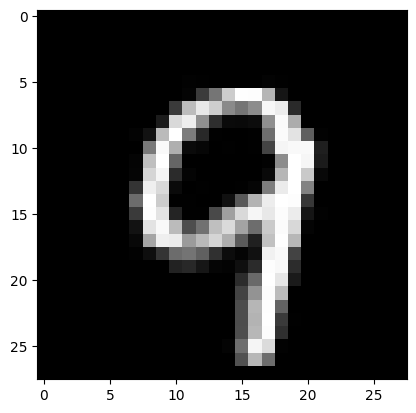

1/1 [==============================] - 0s 87ms/step
9
want some more predictions? (y/n): n


In [10]:
ch='y'
while ch=='y':
  main()
  ch=input("want some more predictions? (y/n): ")

In [11]:
from keras.models import save_model

save_model(model,'handwritten digit recognition.h5')